In [1]:
!python3 -m pip install autogluon

     |████████████████████████████████| 572 kB 15.6 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 62.3 MB/s eta 0:00:01
     |████████████████████████████████| 158 kB 59.1 MB/s eta 0:00:01
     |████████████████████████████████| 882 kB 57.2 MB/s eta 0:00:01
     |████████████████████████████████| 64.8 MB 172 kB/s  eta 0:00:01
     |████████████████████████████████| 28.6 MB 55.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 49.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 54.0 MB/s eta 0:00:01
     |████████████████████████████████| 17.2 MB 50.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.1 MB 46.9 MB/s eta 0:00:01
     |████████████████████████████████| 10.4 MB 45.3 MB/s eta 0:00:01
     |████████████████████████████████| 810 kB 63.0 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 6.5 MB/s  eta 0:00:01
     |██████████████████████████

     |████████████████████████████████| 59 kB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 2.1 MB/s  eta 0:00:01
  Created wheel for openml: filename=openml-0.10.2-py3-none-any.whl size=190318 sha256=1df67efd21cae11a36e188e95b648d344c90e62e4edbaa8ec6f9fa8850eae315
  Stored in directory: /home/ec2-user/.cache/pip/wheels/45/83/27/a45cc845ff2497e34bfc17403e649249e5e717adb08698903d
  Created wheel for ConfigSpace: filename=ConfigSpace-0.4.10-cp36-cp36m-linux_x86_64.whl size=3001046 sha256=654427dfaf2c217e20626975f3e0fa46ee1667c90b50c26802607dd734748b4a
  Stored in directory: /home/ec2-user/.cache/pip/wheels/70/71/a2/00ca7cb0f71294d73e8791d6fe5cd0c7401066ec3b7e1026db
  Created wheel for fastparquet: filename=fastparquet-0.4.1-cp36-cp36m-linux_x86_64.whl size=7123190 sha256=c476577947114718ce1fe635c0bacae8bb32fccb0e9c5b4335f61c32d80bbae1
  Stored in directory: /home/ec2-user/.cache/pip/wheels/8a/c2/8c/3b80e2a78a9932c93ac3fd0c449599c6b1f6fb3ccc4640f331
  Created wheel f

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p36/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import autogluon as ag

filename = ag.download('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip')
ag.unzip(filename)


'data'

In [3]:
from autogluon import ImageClassification as task

dataset = task.Dataset('data/train')

# test_dataset = task.Dataset('data/test', train=False)


scheduler_options: Key 'training_history_callback_delta_secs': Imputing default value 60
scheduler_options: Key 'delay_get_config': Imputing default value True

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


scheduler: FIFOScheduler(
DistributedResourceManager{
(Remote: Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.16.42.86/10605/1' processes=1 threads=4, memory=64.38 GB>, Resource: NodeResourceManager(4 CPUs, 1 GPUs))
})



Model file not found. Downloading.


100%|██████████| 55344/55344 [00:01<00:00, 43941.27KB/s]


Saving Training Curve in checkpoint/plot_training_curves.png


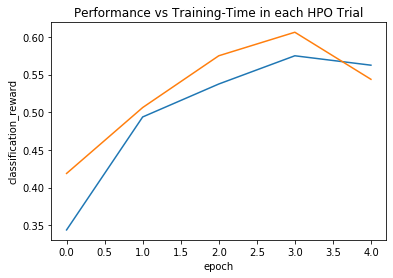

In [4]:
classifier = task.fit(dataset,
                      epochs=5,
                      ngpus_per_trial=1,
                      verbose=False)

In [5]:
print('Top-1 val acc: %.3f' % classifier.results['best_reward'])


Top-1 val acc: 0.562


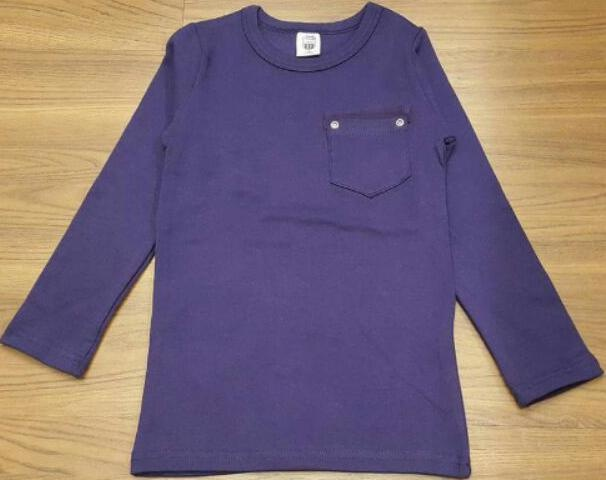

The input picture is classified as [BabyShirt], with probability 0.46.


In [8]:
from IPython.display import Image, display
image = 'data/test/BabyShirt/BabyShirt_323.jpg'
display(Image(filename=image)) 
ind, prob, _ = classifier.predict(image)


print('The input picture is classified as [%s], with probability %.2f.' %
      (dataset.init().classes[ind.asscalar()], prob.asscalar()))


# print('The input picture is classified as [%s], with probability %.2f.' %
#       (dataset.init().classes[ind]))


In [9]:
!pip install torch 
!pip install torchvision

     |████████████████████████████████| 748.8 MB 4.3 kB/s  eta 0:00:01    |████▏                           | 96.5 MB 58.1 MB/s eta 0:00:12     |██████▋                         | 155.2 MB 57.2 MB/s eta 0:00:11
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p36/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 5.9 MB 10.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p36/bin/python -m pip install --upgrade pip' command.


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from tqdm.auto import tqdm

In [11]:
transform = transforms.Compose([
   transforms.ToTensor(),
   transforms.Normalize((0.1307,), (0.3081,))
])

# the datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [12]:
def train_mnist(args, reporter):
    # get variables from args
    lr = args.lr
    wd = args.wd
    epochs = args.epochs
    net = args.net
    print('lr: {}, wd: {}'.format(lr, wd))

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    # Model
    net = net.to(device)

    if device == 'cuda':
        net = nn.DataParallel(net)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=args.lr, momentum=0.9, weight_decay=wd)

    # datasets and dataloaders
    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

    testset = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

    # Training
    def train(epoch):
        net.train()
        train_loss, correct, total = 0, 0, 0
        for batch_idx, (inputs, targets) in enumerate(trainloader):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    def test(epoch):
        net.eval()
        test_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(testloader):
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = net(inputs)
                loss = criterion(outputs, targets)

                test_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

        acc = 100.*correct/total
        # 'epoch' reports the number of epochs done
        reporter(epoch=epoch+1, accuracy=acc)

    for epoch in tqdm(range(0, epochs)):
        train(epoch)
        test(epoch)

In [13]:
import autogluon as ag

@ag.obj(
    hidden_conv=ag.space.Int(6, 12),
    hidden_fc=ag.space.Categorical(80, 120, 160),
)
class Net(nn.Module):
    def __init__(self, hidden_conv, hidden_fc):
        super().__init__()
        self.conv1 = nn.Conv2d(1, hidden_conv, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(hidden_conv, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, hidden_fc)
        self.fc2 = nn.Linear(hidden_fc, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [14]:
@ag.args(
    lr = ag.space.Real(0.01, 0.2, log=True),
    wd = ag.space.Real(1e-4, 5e-4, log=True),
    net = Net(),
    epochs=5,
)
def ag_train_mnist(args, reporter):
    return train_mnist(args, reporter)

In [15]:
myscheduler = ag.scheduler.FIFOScheduler(
    ag_train_mnist,
    resource={'num_cpus': 4, 'num_gpus': 1},
    num_trials=2,
    time_attr='epoch',
    reward_attr='accuracy')
print(myscheduler)

scheduler_options: Key 'searcher': Imputing default value random
scheduler_options: Key 'resume': Imputing default value False
scheduler_options: Key 'visualizer': Imputing default value none
scheduler_options: Key 'training_history_callback_delta_secs': Imputing default value 60
scheduler_options: Key 'delay_get_config': Imputing default value True



FIFOScheduler(
DistributedResourceManager{
(Remote: Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.16.42.86/10605/1' processes=1 threads=4, memory=64.38 GB>, Resource: NodeResourceManager(4 CPUs, 1 GPUs))
})



In [16]:
myscheduler.run()
myscheduler.join_jobs()


Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


lr: 0.0447213595, wd: 0.0002236068




lr: 0.028245913732173278, wd: 0.00017160776862349322


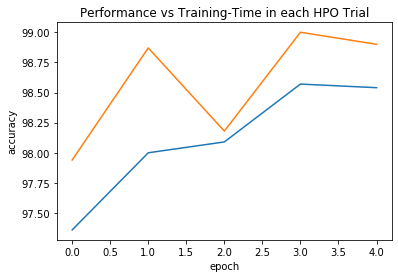

The Best Configuration and Accuracy are: {'lr': 0.028245913732173278, 'net▁hidden_conv': 11, 'net▁hidden_fc▁choice': 0, 'wd': 0.00017160776862349322}, 98.9


In [17]:
myscheduler.get_training_curves(plot=True,use_legend=False)
print('The Best Configuration and Accuracy are: {}, {}'.format(myscheduler.get_best_config(),
                                                               myscheduler.get_best_reward()))


# So, how about unsupervised learning ? 